In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_excel('boro.xlsx')

# data analysis

In [3]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [4]:
df.tail()

,Height,Weight
3496,69.296830,185.649086
3497,70.542201,210.198845
3498,73.912549,202.429960
3499,67.396021,144.277671
3500,72.738970,187.222909


In [5]:
df.head(2)

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473


In [6]:
df.tail(2)

,Height,Weight
3499,67.396021,144.277671
3500,72.738970,187.222909


In [7]:
df[1:6]

,Height,Weight
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
5,67.253016,152.212156


In [8]:
x = df[['Height']]

In [9]:
x.head()

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [11]:
y = df['Weight']
y.head()

0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
Name: Weight, dtype: float64

In [12]:
y.head(4)

0    241.893563
1    162.310473
2    212.740856
3    220.042470
Name: Weight, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split as tts

In [15]:
xtrain,xtest,ytrain,ytest = tts(x,y,test_size=.3,random_state=5)

In [16]:
xtest.head()

,Height
2730,63.914541
2008,66.416414
840,69.016067
2635,71.948486
1721,71.196587


In [18]:
xtrain.head(100)

,Height
3466,67.172828
828,66.653234
2234,65.077902
3245,65.035786
1298,69.702258
...,...
258,71.182455
789,73.141155
1619,70.354617
1348,73.964493


In [19]:
ytrain.head()

3466    181.886241
828     160.147436
2234    165.313807
3245    168.618676
1298    177.149091
Name: Weight, dtype: float64

# Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
reg = LinearRegression()

In [23]:
reg.fit(xtrain,ytrain)

LinearRegression()

In [25]:
m = reg.coef_
m

array([6.00809929])

In [26]:
c = reg.intercept_
c

-227.77595602223445

In [27]:
y = m*4000+c
y

array([23804.62118433])

In [29]:
pre = reg.predict(xtest)
pre

array([156.22895255, 171.26045447, 186.87942774, ..., 205.60020285,
       186.14253731, 219.24585226])

In [30]:
df['predict result'] = reg.predict(x)

In [33]:
df.head(30)

,Height,Weight,predict result
0,73.847017,241.893563,215.904254
1,68.781904,162.310473,185.472553
2,74.110105,212.740856,217.484915
3,71.730978,220.042470,203.190884
4,69.881796,206.349801,192.080812
5,67.253016,152.212156,176.286839
6,68.785081,183.927889,185.491641
7,68.348516,167.971111,182.868711
8,67.018950,175.929440,174.880548
9,63.456494,156.399676,153.476960


In [34]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [35]:
msc = mean_absolute_error(xtest,pre)
msc

117.77226609558987

In [36]:
msc = mean_squared_error(xtest,pre)
msc

14074.602534586233

In [37]:
mae = mean_absolute_error(xtest,pre)
mae

117.77226609558987

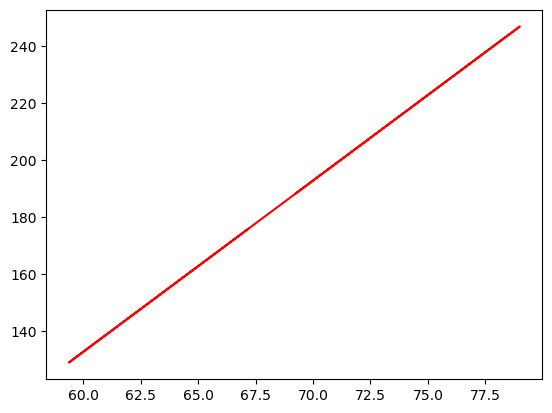

In [38]:
plt.plot(xtrain, reg.predict(xtrain),color='red')

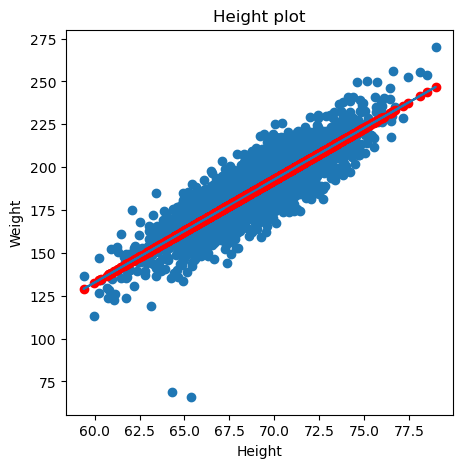

In [43]:
plt.figure(figsize=(5,5))
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height plot')
plt.scatter(xtrain,ytrain)
plt.plot(xtrain,reg.predict(xtrain))
plt.scatter(xtrain,reg.predict(xtrain),color='red')
